In [1]:
from apportionment import *

# for i in range(10):
#     raw2visualisable(f"1m-2023multiTEST{i}.csv", weighted=False)

# for i in range(10):
#     print(f'starting {i}')
#     raw2visualisable(f"1m-2023multiTEST{i}.csv", weighted=False, multi=True)
#     print(f'finished {i}')


In [3]:
# csv_files = [f"./vis_data/unweighted-vis-1m-2023multiTEST{i}.csv" for i in range(10)]

# combined_df = pd.concat([pd.read_csv(f) for f in csv_files])

# averaged_df = combined_df.groupby(["samples", "proportion"]).mean().reset_index()

# averaged_df.to_csv("./vis_data/vis-1m-2023multiTOTALsep.csv", index=False)

# print("Compression complete")

In [2]:
db_file = 'multi.db'

if not os.path.exists(db_file):
    conn = sqlite3.connect(db_file)
    cur = conn.cursor()
            
    cur.execute(f'''CREATE TABLE IF NOT EXISTS tab2023 (
                iteration_number INTEGER,
                party_number INTEGER,
                party_number2 INTEGER,
                samples INTEGER,
                diff INTEGER,
                proportion INTEGER
                );''')

    for i in range(10):
        with open(f'./raw_data/1m-2023multiTEST{i}.csv', 'r') as file:
            reader = csv.reader(file)
            next(reader)  # Skip header if exists
            for i, row in enumerate(reader):
                cur.execute(f'''INSERT INTO tab2023 (iteration_number, party_number, party_number2, samples, diff, proportion)
                                VALUES (?, ?, ?, ?, ?, ?);''', row)
    conn.commit()
    conn.close()

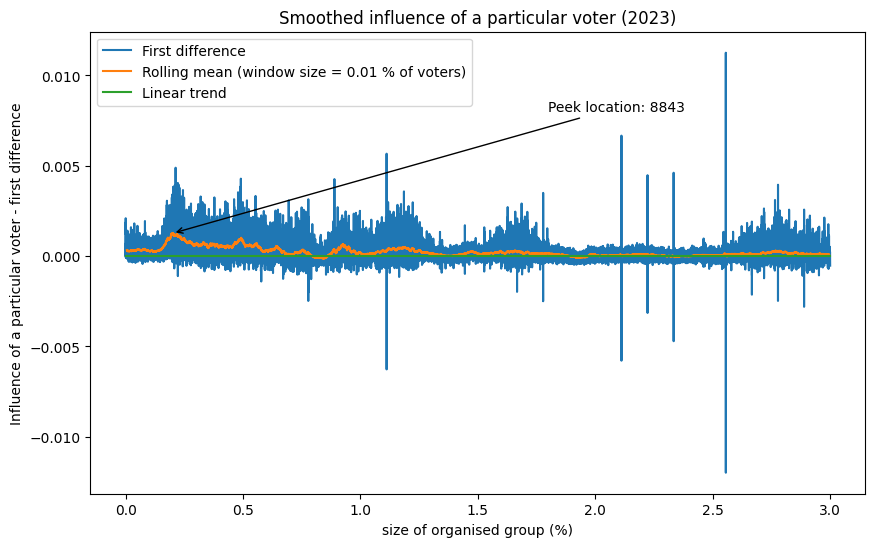

In [45]:
df100 = pd.read_csv("./vis_data/vis-1m-2023.csv")
df = pd.read_csv("./vis_data/vis-1m-2023multiTOTAL.csv")

df.iloc[:, -1] = (1 * df100.iloc[:, -1] + 5 * df.iloc[:, -1]) / 6

x_values = (df['samples'] / 1000000) * 100
y_values = df['diff']
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('size of organised group (%)')
plt.ylabel('Influence of a particular voter - first difference')
plt.title('Smoothed influence of a particular voter (2023)')

plt.legend()

max_index = y_rolling.idxmax()
plt.annotate(f'Peek location: {int(max_index * (4388872 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
                xytext=(1.8, 0.008),
                arrowprops=dict(facecolor='black', arrowstyle='->'))


plt.show()

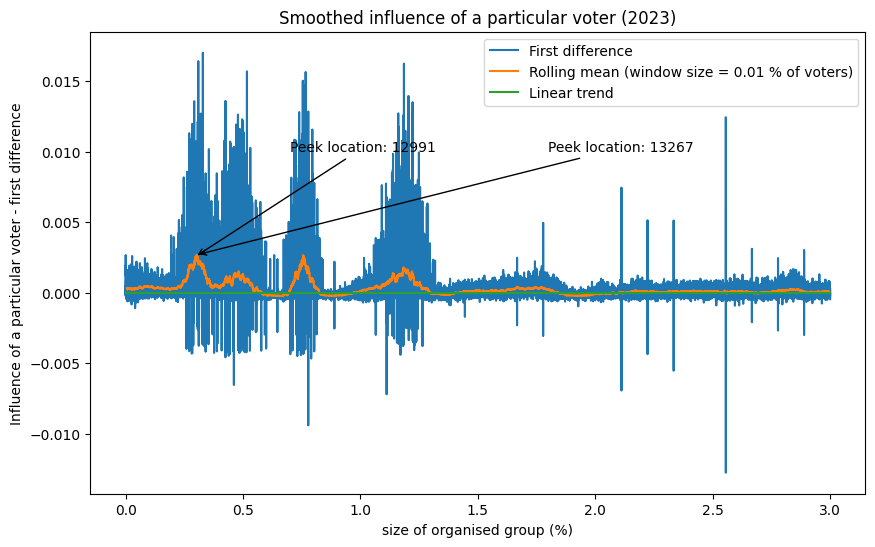

In [59]:
df = pd.read_csv("./vis_data/vis-1m-2023multiTOTALsep.csv")
df100['proportion'] = 100

df = pd.concat([df, df100])
df = df.sort_values(by=['samples', 'proportion'])
df = df.reset_index(drop=True)

dfprop = df[df['proportion'] == 60]
dfprop = dfprop.reset_index(drop=True)

x_values = (dfprop['samples'] / 1000000) * 100
y_values = dfprop['diff']
y_vals =  y_values - (3 * x_values)

y_deriv = y_vals.diff()
y_rolling = y_deriv.rolling(window=100, center=True).mean()

x = np.arange(0, 4)
y = 3 * x

plt.figure(figsize=(10, 6))

plt.plot(x_values, y_deriv, '-', markersize=1, label="First difference")
plt.plot(x_values, y_rolling, '-', markersize=1, label="Rolling mean (window size = 0.01 % of voters)")
plt.plot(x, y * 0, label='Linear trend')

plt.xlabel('size of organised group (%)')
plt.ylabel('Influence of a particular voter - first difference')
plt.title('Smoothed influence of a particular voter (2023)')

plt.legend()

max_index = y_rolling[:3000].idxmax()
plt.annotate(f'Peek location: {int(max_index * (4388872 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),  
                xytext=(0.7, 0.01),
                arrowprops=dict(facecolor='black', arrowstyle='->'))

max_index = y_rolling.idxmax()
plt.annotate(f'Peek location: {int(max_index * (4388872 / 1000000))}', xy=(x_values[max_index], y_rolling[max_index]),
                xytext=(1.8, 0.01),
                arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

In [62]:
for prop in [100, 90, 80, 70, 60, 50]:
    
    dfprop = df[df['proportion'] == prop]
    dfprop = dfprop.reset_index(drop=True)

    x_values = (dfprop['samples'] / 1000000) * 100
    y_values = dfprop['diff']
    y_vals =  y_values - (3 * x_values)

    y_deriv = y_vals.diff()
    y_rolling = y_deriv.rolling(window=100, center=True).mean()

    max_index = y_rolling[:4000].idxmax()
    print(f'Peek 1 location (proportion {prop}): {int(max_index * (4388872 / 1000000))}')

    max_index = y_rolling[4000:].idxmax()
    print(f'Peek 2 location (proporiton {prop}): {int(max_index * (4388872 / 1000000))}')

    print()


Peek 1 location (proportion 100): 7864
Peek 2 location (proporiton 100): 19539

Peek 1 location (proportion 90): 8496
Peek 2 location (proporiton 90): 21562

Peek 1 location (proportion 80): 9664
Peek 2 location (proporiton 80): 24463

Peek 1 location (proportion 70): 11108
Peek 2 location (proporiton 70): 28259

Peek 1 location (proportion 60): 13267
Peek 2 location (proporiton 60): 33184

Peek 1 location (proportion 50): 16159
Peek 2 location (proporiton 50): 40632

